#### Analyze snapshots

Notebook for analysing snapshots of Cluster example.

In [1]:
# load libraries
import sys  # load sys; needed for exit codes
import numpy as np  # load numpy
import h5py  # load h5py; needed to read snapshots
import matplotlib
import matplotlib.pyplot as plt  ## needs to be active for plotting!
import csv
import os

#Import a couple of useful modules
#(These are written by BJK rather than being native to the gadget4 codebase)
sys.path.append("../../")
import units as u
import analysis

matplotlib.rc_file_defaults()
FloatType = np.float64

In [2]:
#For the step-sizes defined in the param.txt file, we should have 12 snapshots
snap_list = np.arange(12)

In [3]:
#This function loads a list of snapshots and gives the particle trajectories
#ts is the list of times of the snapshots 
#Pos_full are the particle positions, with dimensions (N_snapshots, N_particles, 3)
a, Pos_full = analysis.load_all_snapshots("output", snap_list, cgs_units=False)

#Here, we want cgs_units=False, because the 'time' coordinate is not physical time, 
#it's the scale factor. So we'll convert into cgs_units afterwards
Pos_full *= u.Lcode

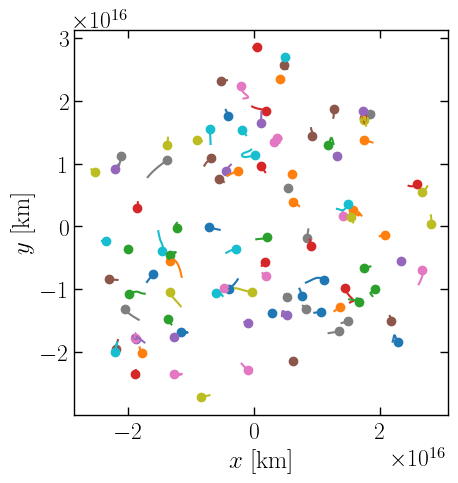

In [4]:
plt.figure(figsize=(5,5))

#Loop over the two particles and the plot the (x,y) trajectories
for i_part in range(100):
    plt.plot(Pos_full[:,i_part,0]/u.km, Pos_full[:,i_part,1]/u.km)
    plt.scatter(Pos_full[-1,i_part,0]/u.km, Pos_full[-1,i_part,1]/u.km)
   

ax = plt.gca()
ax.set_aspect("equal")
ax.set_xlabel('$x$ [km]')
ax.set_ylabel('$y$ [km]')

plt.show()

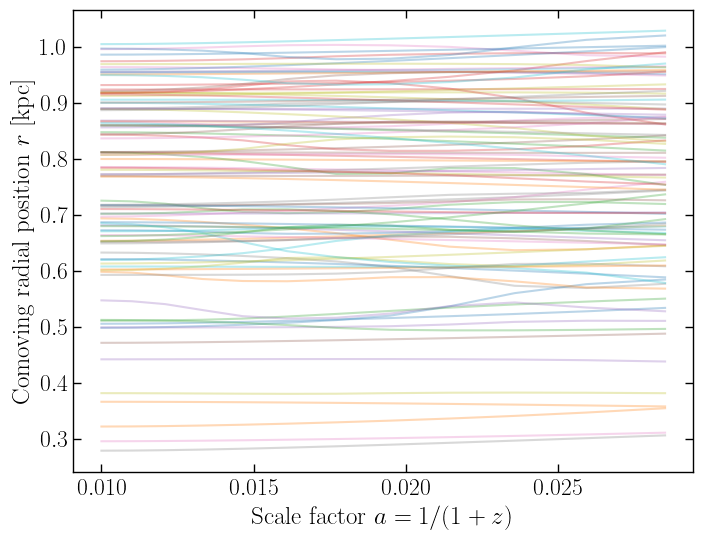

In [5]:
#Calculate the comoving radial position of each particle in the cluster and plot
rs = np.sqrt(np.sum(Pos_full**2, axis=-1))

plt.figure()

for i in range(100):
    plt.plot(a, (rs[:,i]/u.kpc), alpha=0.3)

plt.xlabel(r'Scale factor $a = 1/(1+z)$')
plt.ylabel(r'Comoving radial position $r$ [kpc]')
plt.show()

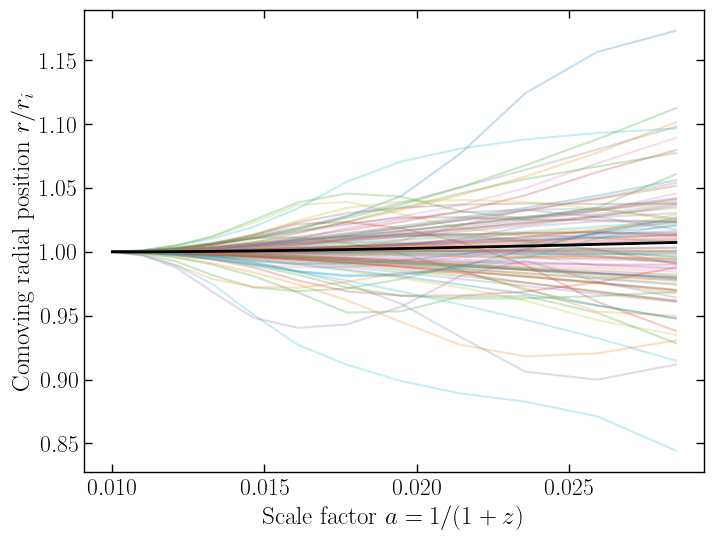

In [6]:
#Now let's plot the same thing but normalised to the *initial* radius of the particle
plt.figure()

for i in range(100):
    plt.plot(a, (rs[:,i]/rs[0,i]), alpha=0.25)
    
plt.plot(a, np.mean((rs[:,:]/rs[0,:]), axis=-1), 'k-', lw=2)

plt.xlabel(r'Scale factor $a = 1/(1+z)$')
plt.ylabel(r'Comoving radial position $r/r_i$')
plt.show()